In [13]:
# Imports
import pandas as pd
from IPython.display import display, HTML
from sklearn.decomposition import PCA
import numpy
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


### Visualizing our new dataset.

When working with large datasets, visualizations are useful to understand the properties of that dataset. We'll start by importing our data points into a data frame.


In [14]:
df=pd.read_csv("USArrests.csv",index_col=0)


In [15]:
display(df)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


Standardize: the variables:

In [17]:
#complete code here...
df1 = df.apply(lambda x: (x-x.mean()) / x.std())

#display the result:
display(df1)

,Murder,Assault,UrbanPop,Rape
Alabama,1.242564,0.782839,-0.520907,-0.003416
Alaska,0.507862,1.106823,-1.211764,2.484203
Arizona,0.071633,1.478803,0.998980,1.042878
Arkansas,0.232349,0.230868,-1.073593,-0.184917
California,0.278268,1.262814,1.758923,2.067820
Colorado,0.025715,0.398859,0.860809,1.864967
Connecticut,-1.030419,-0.729082,0.791723,-1.081741
Delaware,-0.433474,0.806838,0.446294,-0.579946
Florida,1.747671,1.970778,0.998980,1.138967
Georgia,2.206860,0.482855,-0.382735,0.487702


Now, we'll run PCA with 2 components. This enables to represent the data in a new basis: the 2 found vectors.

In [18]:
pca = PCA(n_components=2)
val = df1.as_matrix()
X_r = pca.fit(val).transform(val)

/Users/jeremybensoussan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


The new basis is:

In [19]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864]])

Let's visualize the original 4 features in the new basis:

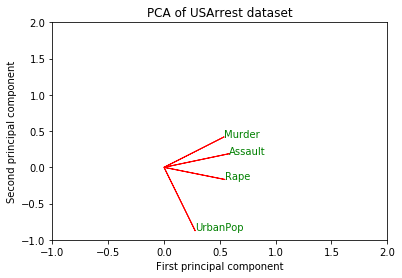

In [21]:
t = df1.shape
for i,label in zip (range(df1.shape[1]),list(df1.columns.values)):
    plt.arrow(0, 0, pca.components_[0, i],pca.components_[1,i],color = 'r')
    plt.text(pca.components_[0,i],pca.components_[1,i],label, color = 'g')

plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.title('PCA of USArrest dataset')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

As a final step, we'll add the points:

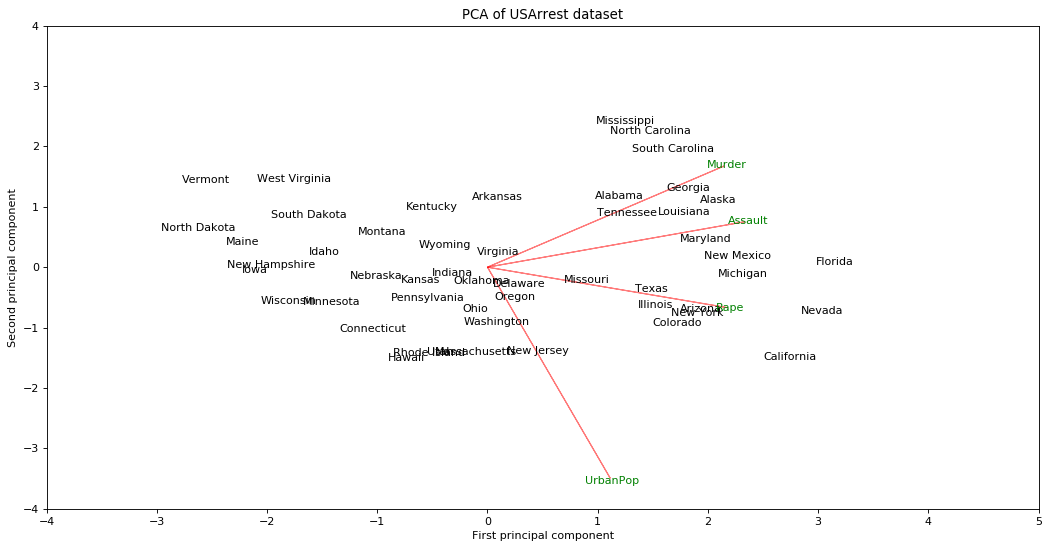

In [75]:
plt.figure(figsize=(16, 8), dpi=80)
# for i,label in zip (range(df1.shape[1]),list(df1.columns.values)):
#     plt.text(pca.components_[0,i],pca.components_[1,i],label, color = 'g')
    
for i, txt in zip(range(df1.shape[0]),list(df1.index)):
    plt.annotate(txt, (X_r[i, 0], X_r[i, 1]))
for i,label in zip (range(df1.shape[1]),list(df1.columns.values)):
    plt.arrow(0, 0, pca.components_[0, i]*4,pca.components_[1,i]*4,color = 'r',alpha = 0.5)
    plt.text(pca.components_[0,i]* 4.05, pca.components_[1,i] * 4.05, label, color = 'g', ha = 'center', va = 'center')
plt.title('PCA of USArrest dataset')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
 # set axes range
plt.xlim(-4, 5)
plt.ylim(-4, 4)
plt.show()

The following is an example of how to perform hierarchical clustering on the set of points we've seen last week. The cut height determines how many clusters we'll have.

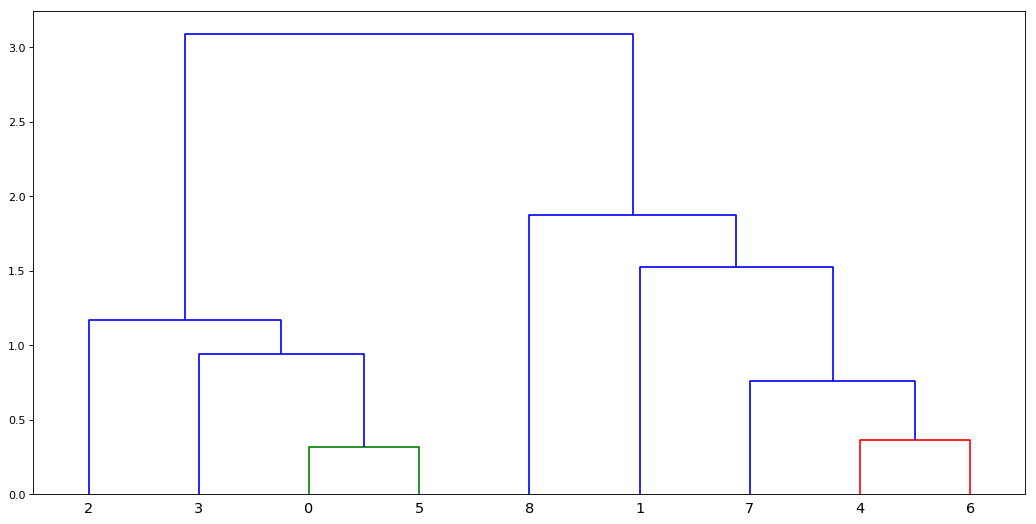

In [68]:
x = numpy.array([-0.6,0.0,-1.6,-1.4,1.2,-0.9,1.3,0.6,-0.1])
y = numpy.array([-1,-0.8,-0.4,-1.5,-0.35,-1.1,0,-0.3,1])
X = numpy.stack((x,y),axis=1)
Z = linkage(X, 'complete')
plt.figure(figsize=(16, 8), dpi=80)
dendrogram(
    Z,
    leaf_font_size=13.,  # font size for the x axis labels
    color_threshold = 0.5 #Cut height
)
plt.show()


Consider the USArrests data. We will now perform hierarchical clustering on the states.

(a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

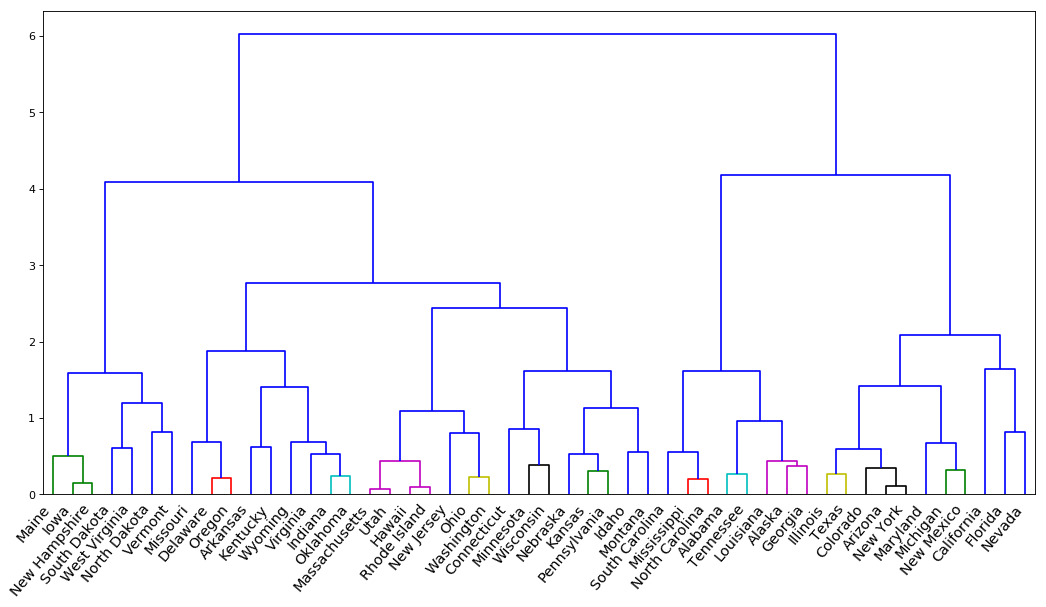

In [85]:
x = numpy.array(X_r[:, 0])
y = numpy.array(X_r[:, 1])
labels = df1.index
X = numpy.stack((x,y),axis=1)
Z = linkage(X, 'complete')
plt.figure(figsize=(16, 8), dpi=80)
dendrogram(
    Z,
    labels=labels,
    leaf_font_size=13.,  # font size for the x axis labels
    color_threshold = 0.5 #Cut height
)
plt.xticks(rotation=50, ha='right')
plt.show()

(b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

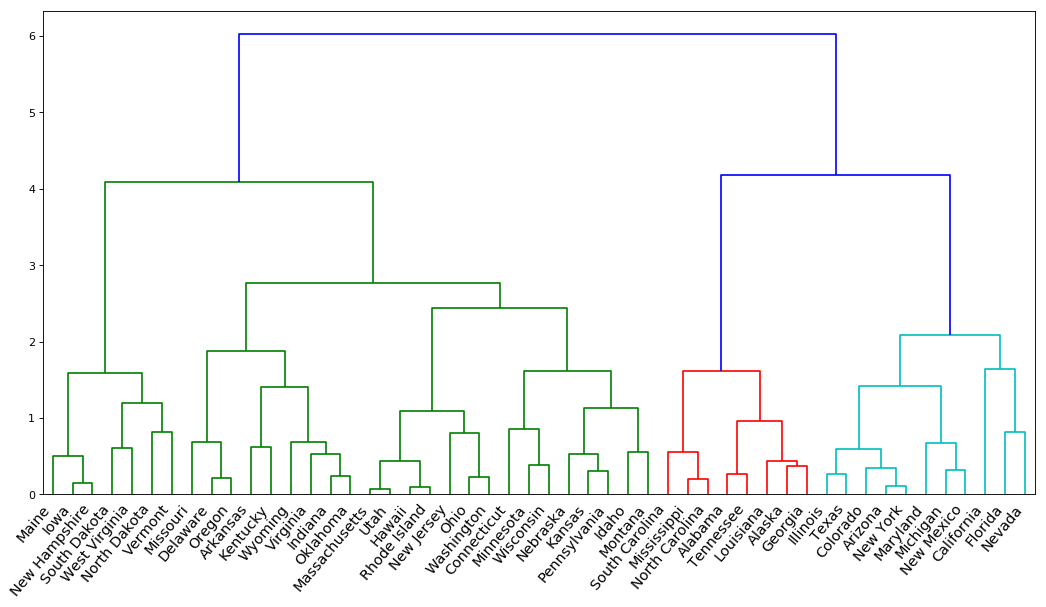

In [88]:
x = numpy.array(X_r[:, 0])
y = numpy.array(X_r[:, 1])
labels = df1.index
X = numpy.stack((x,y),axis=1)
Z = linkage(X, 'complete')
plt.figure(figsize=(16, 8), dpi=80)
dendrogram(
    Z,
    labels=labels,
    leaf_font_size=13.,  # font size for the x axis labels
    color_threshold = 4.1 #Cut height
)
plt.xticks(rotation=50, ha='right')
plt.show()

This dendrogram is isolating states that are clustered together in the PCA chart. More specifically, the states in the red cluster seem to revolve around Rape on the PCA chart, the teal states are clustered around assault and murder, and the green states are more in the middle of the PCA chart.

(c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

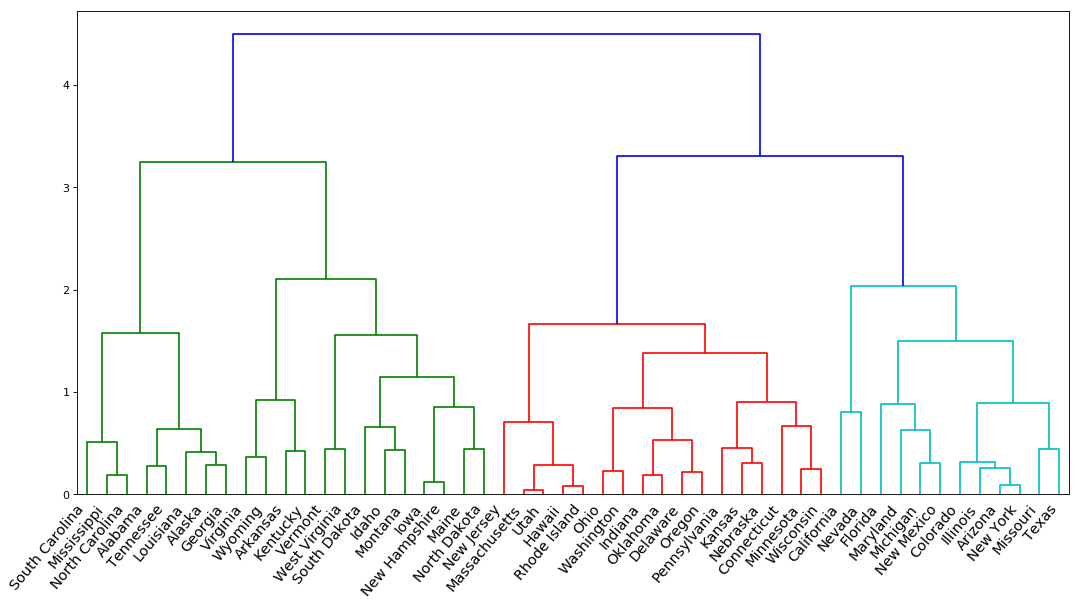

In [102]:
x = numpy.array(X_r[:, 0])
x_scaled = x / x.std()
y = numpy.array(X_r[:, 1])
y_scaled = y / y.std()

labels = df1.index
X = numpy.stack((x_scaled,y_scaled),axis=1)
Z = linkage(X, 'complete')
plt.figure(figsize=(16, 8), dpi=80)
dendrogram(
    Z,
    labels=labels,
    leaf_font_size=13.,  # font size for the x axis labels
    color_threshold = 3.28 #Cut height
)
plt.xticks(rotation=50, ha='right')
plt.show()

(d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed?
Provide a justification for your answer.

<font color='blue'>Scaling the variables attenuates the bigger distances more than the smaller ones. As a result, the dendrogram tree is more balanced, and each cluster has a more similar number of individuals. 

In other words, scaling the variables reduces the differences of number of individual in the biggest vs smallest clusters.</font>